In [11]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('scdb-100-25-3-metrics.csv', names = ['Event', 'Time', 'Tx_type', 'Tx_id', 'Accept_id', 'time'])

In [13]:
#grouping every transaction by its ID
grouped_data = data.groupby('Tx_id')

In [14]:
tx_id = list(grouped_data.groups.keys())
len(tx_id)

3389

In [15]:
#new data frame to get the count of each transaction type
data_unique_ids = data.drop_duplicates(subset = ['Tx_id'])

accept_count = 0
for i in range(0, len(data_unique_ids)):
    if data_unique_ids.iloc[i]['Tx_type'] == 'ACCEPT':
        accept_count += 1   


print(f"#ACCEPTs =  {accept_count}")


#ACCEPTs =  53


In [37]:
time_all_committed_accepts = {}
time_passed_accepts = []
accept_time = {}
time_failed_accepts = []
accept_underfit = []
accept_overfit = []
other_accepts = []

time_accept = []
time_id_accept = {}

time_returns = []
accept_return_count = {}

for i in range(0, len(tx_id)):
    temp_list = []
    return_count = 0
    if "ACCEPT" == grouped_data.get_group(tx_id[i])["Tx_type"].to_list()[0]:
        temp_list = grouped_data.get_group(tx_id[i])["Time"].to_list()
        for j in range(0, len(data)):
            if data['Event'][j] == "commit_tx" and tx_id[i] == data['Accept_id'][j]:
                temp_list.append(data["Time"][j])
                return_count += 1
        accept_return_count [tx_id[i]] = return_count
        last_return = max(temp_list)
        time_accept.append(last_return)
        time_id_accept[tx_id[i]] = last_return
        temp_list = grouped_data.get_group(tx_id[i])["Time"].to_list()
        
        if len(temp_list) == 6 and grouped_data.get_group(tx_id[i])["Event"].to_list()[5] == "commit_tx":
            temp_list.append(last_return)
            actual_time = max(temp_list)
            time_all_committed_accepts[tx_id[i]] = actual_time
            time_passed_accepts.append(actual_time)
            accept_time[tx_id[i]] = actual_time
        elif 2 <= len(temp_list) < 6:
            temp_list.append(last_return)
            temp_list.append(tx_id[i])
            accept_underfit.append(temp_list)
        elif 6 <= len(temp_list) <= 10:
            temp_list = grouped_data.get_group(tx_id[i]).drop_duplicates(subset=['Event'])["Time"].to_list()
            time_all_committed_accepts[tx_id[i]] = actual_time
            temp_list.append(last_return)
            actual_time = max(temp_list)
            time_passed_accepts.append(actual_time)
            temp_list.append(tx_id[i])
            temp_list.append(actual_time)
            accept_overfit.append(temp_list)
            
        else:
            temp_list.append(last_return)
            temp_list.append(tx_id[i])
            other_accepts.append(temp_list)



In [38]:
accept_overfit

[[11.0,
  27.0,
  54.0,
  891.0,
  895.0,
  1098.0,
  1628.0,
  '09009f2964e9f1990662d381cdde5e72efc094aaa34775c8636200dfd6cc6100',
  1628.0],
 [6.0,
  24.0,
  43.0,
  955.0,
  959.0,
  1165.0,
  1802.0,
  '0f3544df5e18e8d853c5bdffe313f01ba64190fad6c88078bfa04f4c885554dc',
  1802.0],
 [21.0,
  42.0,
  63.0,
  965.0,
  969.0,
  1171.0,
  3400.0,
  '100b489219b5e24edefb45f9b8ecb104f50c0b8c6b85f562d624951bf4bab963',
  3400.0],
 [8.0,
  26.0,
  45.0,
  683.0,
  687.0,
  890.0,
  3022.0,
  '19aff079289a582881770deae243b04484c33920af441fe70fa464a21a899254',
  3022.0],
 [7.0,
  25.0,
  46.0,
  1218.0,
  1221.0,
  1426.0,
  3513.0,
  '26c4bf6a7968ebdd9dffd0fd024c552a5fea21cd9054f1b77ac34195cd8f8223',
  3513.0],
 [7.0,
  23.0,
  40.0,
  546.0,
  553.0,
  768.0,
  1924.0,
  '2e05dc1bf47a0ec0d6bd3ad664eef4826598aa80b4c5262f0a01923ab4e096e1',
  1924.0],
 [7.0,
  28.0,
  51.0,
  535.0,
  542.0,
  758.0,
  3943.0,
  '3b36e8d75e29edda6e4c2696b7d0be98470644613ad22ea2b7a00c979c974386',
  3943.0],
 [6.0

In [39]:
print(f" #of unprocessed accepts = {len(accept_underfit)}")
print(f" #of overprocessed accepts = {len(accept_overfit)}")
print(f" #of processed accepts = {len(time_passed_accepts)}")
print(f" #of other accepts = {len(other_accepts)}")

 #of unprocessed accepts = 19
 #of overprocessed accepts = 30
 #of processed accepts = 31
 #of other accepts = 3


In [40]:
len(time_all_committed_accepts)

31

In [41]:
accept_overfit

[[11.0,
  27.0,
  54.0,
  891.0,
  895.0,
  1098.0,
  1628.0,
  '09009f2964e9f1990662d381cdde5e72efc094aaa34775c8636200dfd6cc6100',
  1628.0],
 [6.0,
  24.0,
  43.0,
  955.0,
  959.0,
  1165.0,
  1802.0,
  '0f3544df5e18e8d853c5bdffe313f01ba64190fad6c88078bfa04f4c885554dc',
  1802.0],
 [21.0,
  42.0,
  63.0,
  965.0,
  969.0,
  1171.0,
  3400.0,
  '100b489219b5e24edefb45f9b8ecb104f50c0b8c6b85f562d624951bf4bab963',
  3400.0],
 [8.0,
  26.0,
  45.0,
  683.0,
  687.0,
  890.0,
  3022.0,
  '19aff079289a582881770deae243b04484c33920af441fe70fa464a21a899254',
  3022.0],
 [7.0,
  25.0,
  46.0,
  1218.0,
  1221.0,
  1426.0,
  3513.0,
  '26c4bf6a7968ebdd9dffd0fd024c552a5fea21cd9054f1b77ac34195cd8f8223',
  3513.0],
 [7.0,
  23.0,
  40.0,
  546.0,
  553.0,
  768.0,
  1924.0,
  '2e05dc1bf47a0ec0d6bd3ad664eef4826598aa80b4c5262f0a01923ab4e096e1',
  1924.0],
 [7.0,
  28.0,
  51.0,
  535.0,
  542.0,
  758.0,
  3943.0,
  '3b36e8d75e29edda6e4c2696b7d0be98470644613ad22ea2b7a00c979c974386',
  3943.0],
 [6.0

In [42]:
len(time_passed_accepts)

31

In [43]:
#DO
grouped_data.get_group('09009f2964e9f1990662d381cdde5e72efc094aaa34775c8636200dfd6cc6100')

,Event,Time,Tx_type,Tx_id,Accept_id,time
747,received_tx,11.0,ACCEPT,09009f2964e9f1990662d381cdde5e72efc094aaa34775...,None,1.666825e+09
752,before_tendermint,27.0,ACCEPT,09009f2964e9f1990662d381cdde5e72efc094aaa34775...,None,1.666825e+09
755,check_tx,54.0,ACCEPT,09009f2964e9f1990662d381cdde5e72efc094aaa34775...,None,1.666825e+09
760,check_tx,475.0,ACCEPT,09009f2964e9f1990662d381cdde5e72efc094aaa34775...,None,1.666825e+09
762,deliver_tx,891.0,ACCEPT,09009f2964e9f1990662d381cdde5e72efc094aaa34775...,None,1.666825e+09
764,end_block,895.0,ACCEPT,09009f2964e9f1990662d381cdde5e72efc094aaa34775...,None,1.666825e+09
766,commit_tx,1098.0,ACCEPT,09009f2964e9f1990662d381cdde5e72efc094aaa34775...,None,1.666825e+09


In [45]:
#number of RFQs below or above the threshold
threshold = 10000
c = len([i for i in time_passed_accepts if i < threshold])

In [46]:
c

85

In [44]:
# Analysis of ACCEPT Transaction

accept_mean = stat.mean(time_passed_accepts)
accept_median = stat.median(time_passed_accepts)
accept_max = max(time_passed_accepts)
accept_min = min(time_passed_accepts)
accept_std_dev = stat.stdev(time_passed_accepts)

print(accept_mean)
print(accept_median)
print(accept_max)
print(accept_min)
print(accept_std_dev)
print(f"total ACCEPTs = {len(time_passed_accepts)}")

accept_dict = {
               'min': accept_min,
               'max': accept_max,
               'median' : accept_median,
               'average': accept_mean,
               'standard_deviation' : accept_std_dev,
               '# of txs' : accept_count}

2686.3225806451615
2686.0
4129.0
1508.0
884.5474318202416
total ACCEPTs = 31


In [45]:
successfull_rate = len(time_passed_accepts) / accept_count * 100
successfull_rate

58.490566037735846

In [48]:
df = pd.DataFrame(time_passed_accepts)

In [49]:
df.to_csv('accept_data.csv', sep=',', encoding='utf-8')

In [46]:
len(time_passed_accepts)

31

In [50]:
df.quantile( [0.25, 0.5, 0.75, 0.95])

,0
0.25,4786.0
0.50,6514.0
0.75,8842.0
0.95,10549.8


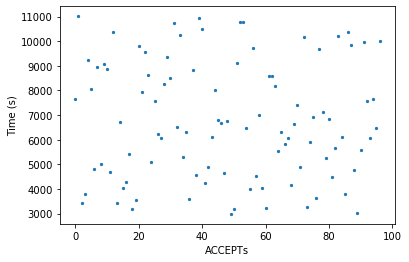

In [53]:
import matplotlib.pyplot as plt
plt.scatter(list(range(0,len(time_passed_accepts))), time_passed_accepts, s=5)
plt.ylabel('Time (s)')
plt.xlabel('ACCEPTs')
plt.show()

In [55]:
#number of BIDS below or above the threshold
min_threshold = 100
max_threshold = 5000
rfq_count = len([i for i in time_passed_accepts if min_threshold <= i <= max_threshold])
rfq_count

28

Text(0, 0.5, 'Number of Transactions')

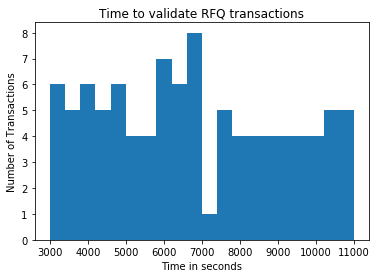

In [56]:
H_A = time_passed_accepts
plt.title('Time to validate RFQ transactions')
plt.hist(H_A, bins = 20) #[0,1,2,3,3.3828]
plt.xlabel("Time in seconds")
plt.ylabel("Number of Transactions")
